In [58]:
import pandas as pd
import numpy as np
import random
from config import __RANDOM_SEED__, sample_size
frequency = "weekly"
initial_months = 1
random.seed(__RANDOM_SEED__)

In [67]:
df = pd.read_csv(f'../Dataset/Hospital Billing Delta Logs/cases_output/cases_output_{frequency}_({initial_months}).csv')

proportions = df['final_status'].value_counts(normalize=True)
sample_proportions = (proportions * sample_size).round().astype(int)

sampled_df = pd.concat(
    [df[df['final_status'] == status].sample(n=size, random_state=42) 
     for status, size in sample_proportions.items()]
)
print(sampled_df['final_status'].value_counts(normalize=True))

final_status
COMPLETE      0.71
INCOMPLETE    0.21
ONGOING       0.08
Name: proportion, dtype: float64


In [68]:
sampled_df = sampled_df[["case_id", "cancelled", "trace", "last_state", "final_status"]]
sampled_df["manual_label"] = np.nan 
sampled_df.to_excel("../Dataset/excel/Hospital Billing Sampled Traces.xlsx")

Accuracy: 92.00%
Confusion Matrix:
[[71  0  0]
 [ 0 21  8]
 [ 0  0  0]]
Classification Report:
              precision    recall  f1-score   support

    COMPLETE       1.00      1.00      1.00        71
  INCOMPLETE       1.00      0.72      0.84        29
     ONGOING       0.00      0.00      0.00         0

    accuracy                           0.92       100
   macro avg       0.67      0.57      0.61       100
weighted avg       1.00      0.92      0.95       100


C:\Users\ozndn\PycharmProjects\1734970_BEP_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ozndn\PycharmProjects\1734970_BEP_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ozndn\PycharmProjects\1734970_BEP_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

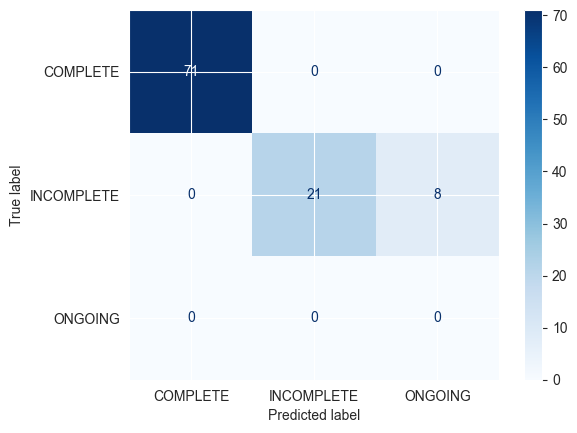

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

labelled_df = pd.read_excel("../Dataset/excel/Hospital Billing Sampled Traces LABELLED.xlsx")
y_true = labelled_df['manual_label']  
y_pred = labelled_df['final_status']  

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_true, y_pred, labels=["COMPLETE", "INCOMPLETE", "ONGOING"])
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["COMPLETE", "INCOMPLETE", "ONGOING"])
disp.plot(cmap=plt.cm.Blues)


report = classification_report(y_true, y_pred, labels=["COMPLETE", "INCOMPLETE", "ONGOING"])
print("Classification Report:")
print(report)

In [75]:
# event_log = pd.read_csv(f'../Dataset/csv/Hospital Billing - Event Log.csv')
# 
# sampled_event = event_log[event_log["case"].isin(sampled_df["case_id"])][["case","event", "state"]]
# sampled_event["manual_class"] = np.nan 
# print(f"Number of sampled cases: {len(sampled_event["case"].unique())}")